Project

In [2]:
from msilib.schema import Class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.neighbors as nei
import seaborn as sns
import sklearn.model_selection as mod

#  Attribute                     Domain
   -- -----------------------------------------
  - 1. Sample code number            id number
  - 2. Clump Thickness               1 - 10
  - 3. Uniformity of Cell Size       1 - 10
  - 4. Uniformity of Cell Shape      1 - 10
  - 5. Marginal Adhesion             1 - 10
  - 6. Single Epithelial Cell Size   1 - 10
  - 7. Bare Nuclei                   1 - 10
  - 8. Bland Chromatin               1 - 10
  - 9. Normal Nucleoli               1 - 10
  - 10. Mitoses                       1 - 10
  - 11. Class:                        (2 for benign, 4 for malignant)

In [3]:
colnames=['Sample code number id number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class' ]
#index=('Iris Setosa', 'Iris Versicolour', 'Iris Virginica')
df = pd.read_csv("breast-cancer-wisconsin.data",names=colnames)

In [4]:
df

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [7]:
df.dtypes

Sample code number id number     int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                     object
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [8]:
print(df.columns)

Index(['Sample code number id number', 'Clump Thickness',
       'Uniformity of Cell Size', 'Uniformity of Cell Shape',
       'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
       'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [9]:
breastCancer_describe = df.head(10)
print(breastCancer_describe)

   Sample code number id number  Clump Thickness  Uniformity of Cell Size  \
0                       1000025                5                        1   
1                       1002945                5                        4   
2                       1015425                3                        1   
3                       1016277                6                        8   
4                       1017023                4                        1   
5                       1017122                8                       10   
6                       1018099                1                        1   
7                       1018561                2                        1   
8                       1033078                2                        1   
9                       1033078                4                        2   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                           

In [10]:
print(df.shape)

print(df["Class"].value_counts())

(699, 11)
2    458
4    241
Name: Class, dtype: int64


In [11]:
summary_all = df.describe()
print(summary_all)

       Sample code number id number  Clump Thickness  Uniformity of Cell Size  \
count                  6.990000e+02       699.000000               699.000000   
mean                   1.071704e+06         4.417740                 3.134478   
std                    6.170957e+05         2.815741                 3.051459   
min                    6.163400e+04         1.000000                 1.000000   
25%                    8.706885e+05         2.000000                 1.000000   
50%                    1.171710e+06         4.000000                 1.000000   
75%                    1.238298e+06         6.000000                 5.000000   
max                    1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                699.000000         699.000000   
mean                   3.207439           2.806867   
std                    2.971913           2.855379   
min                    1.000000           1.000000   


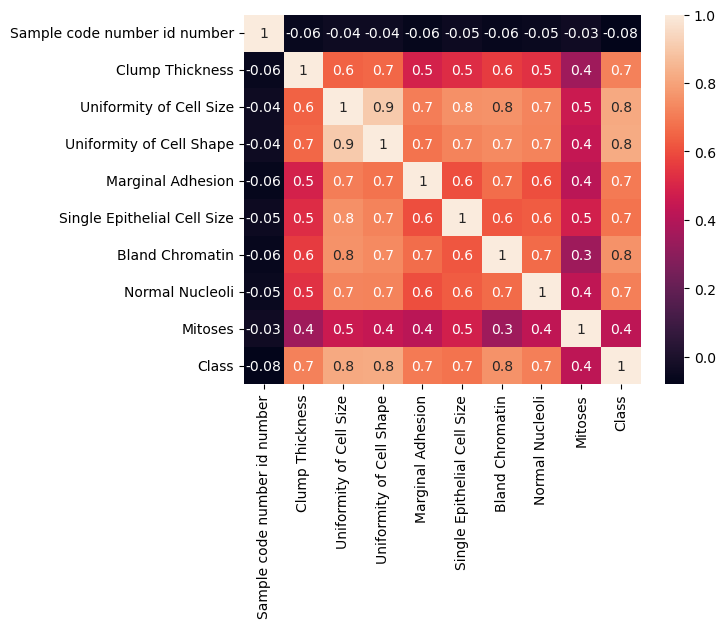

In [12]:
sns.heatmap(df.corr(),annot=True,fmt='.1g')
plt.show()

In [13]:
df.tail()

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [14]:
df.head()

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
print(df.shape)

(699, 11)


In [16]:
print(df["Class"].value_counts())

2    458
4    241
Name: Class, dtype: int64


In [17]:
df.isnull().sum()

Sample code number id number    0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                     0
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [18]:
df.dropna(inplace=True)

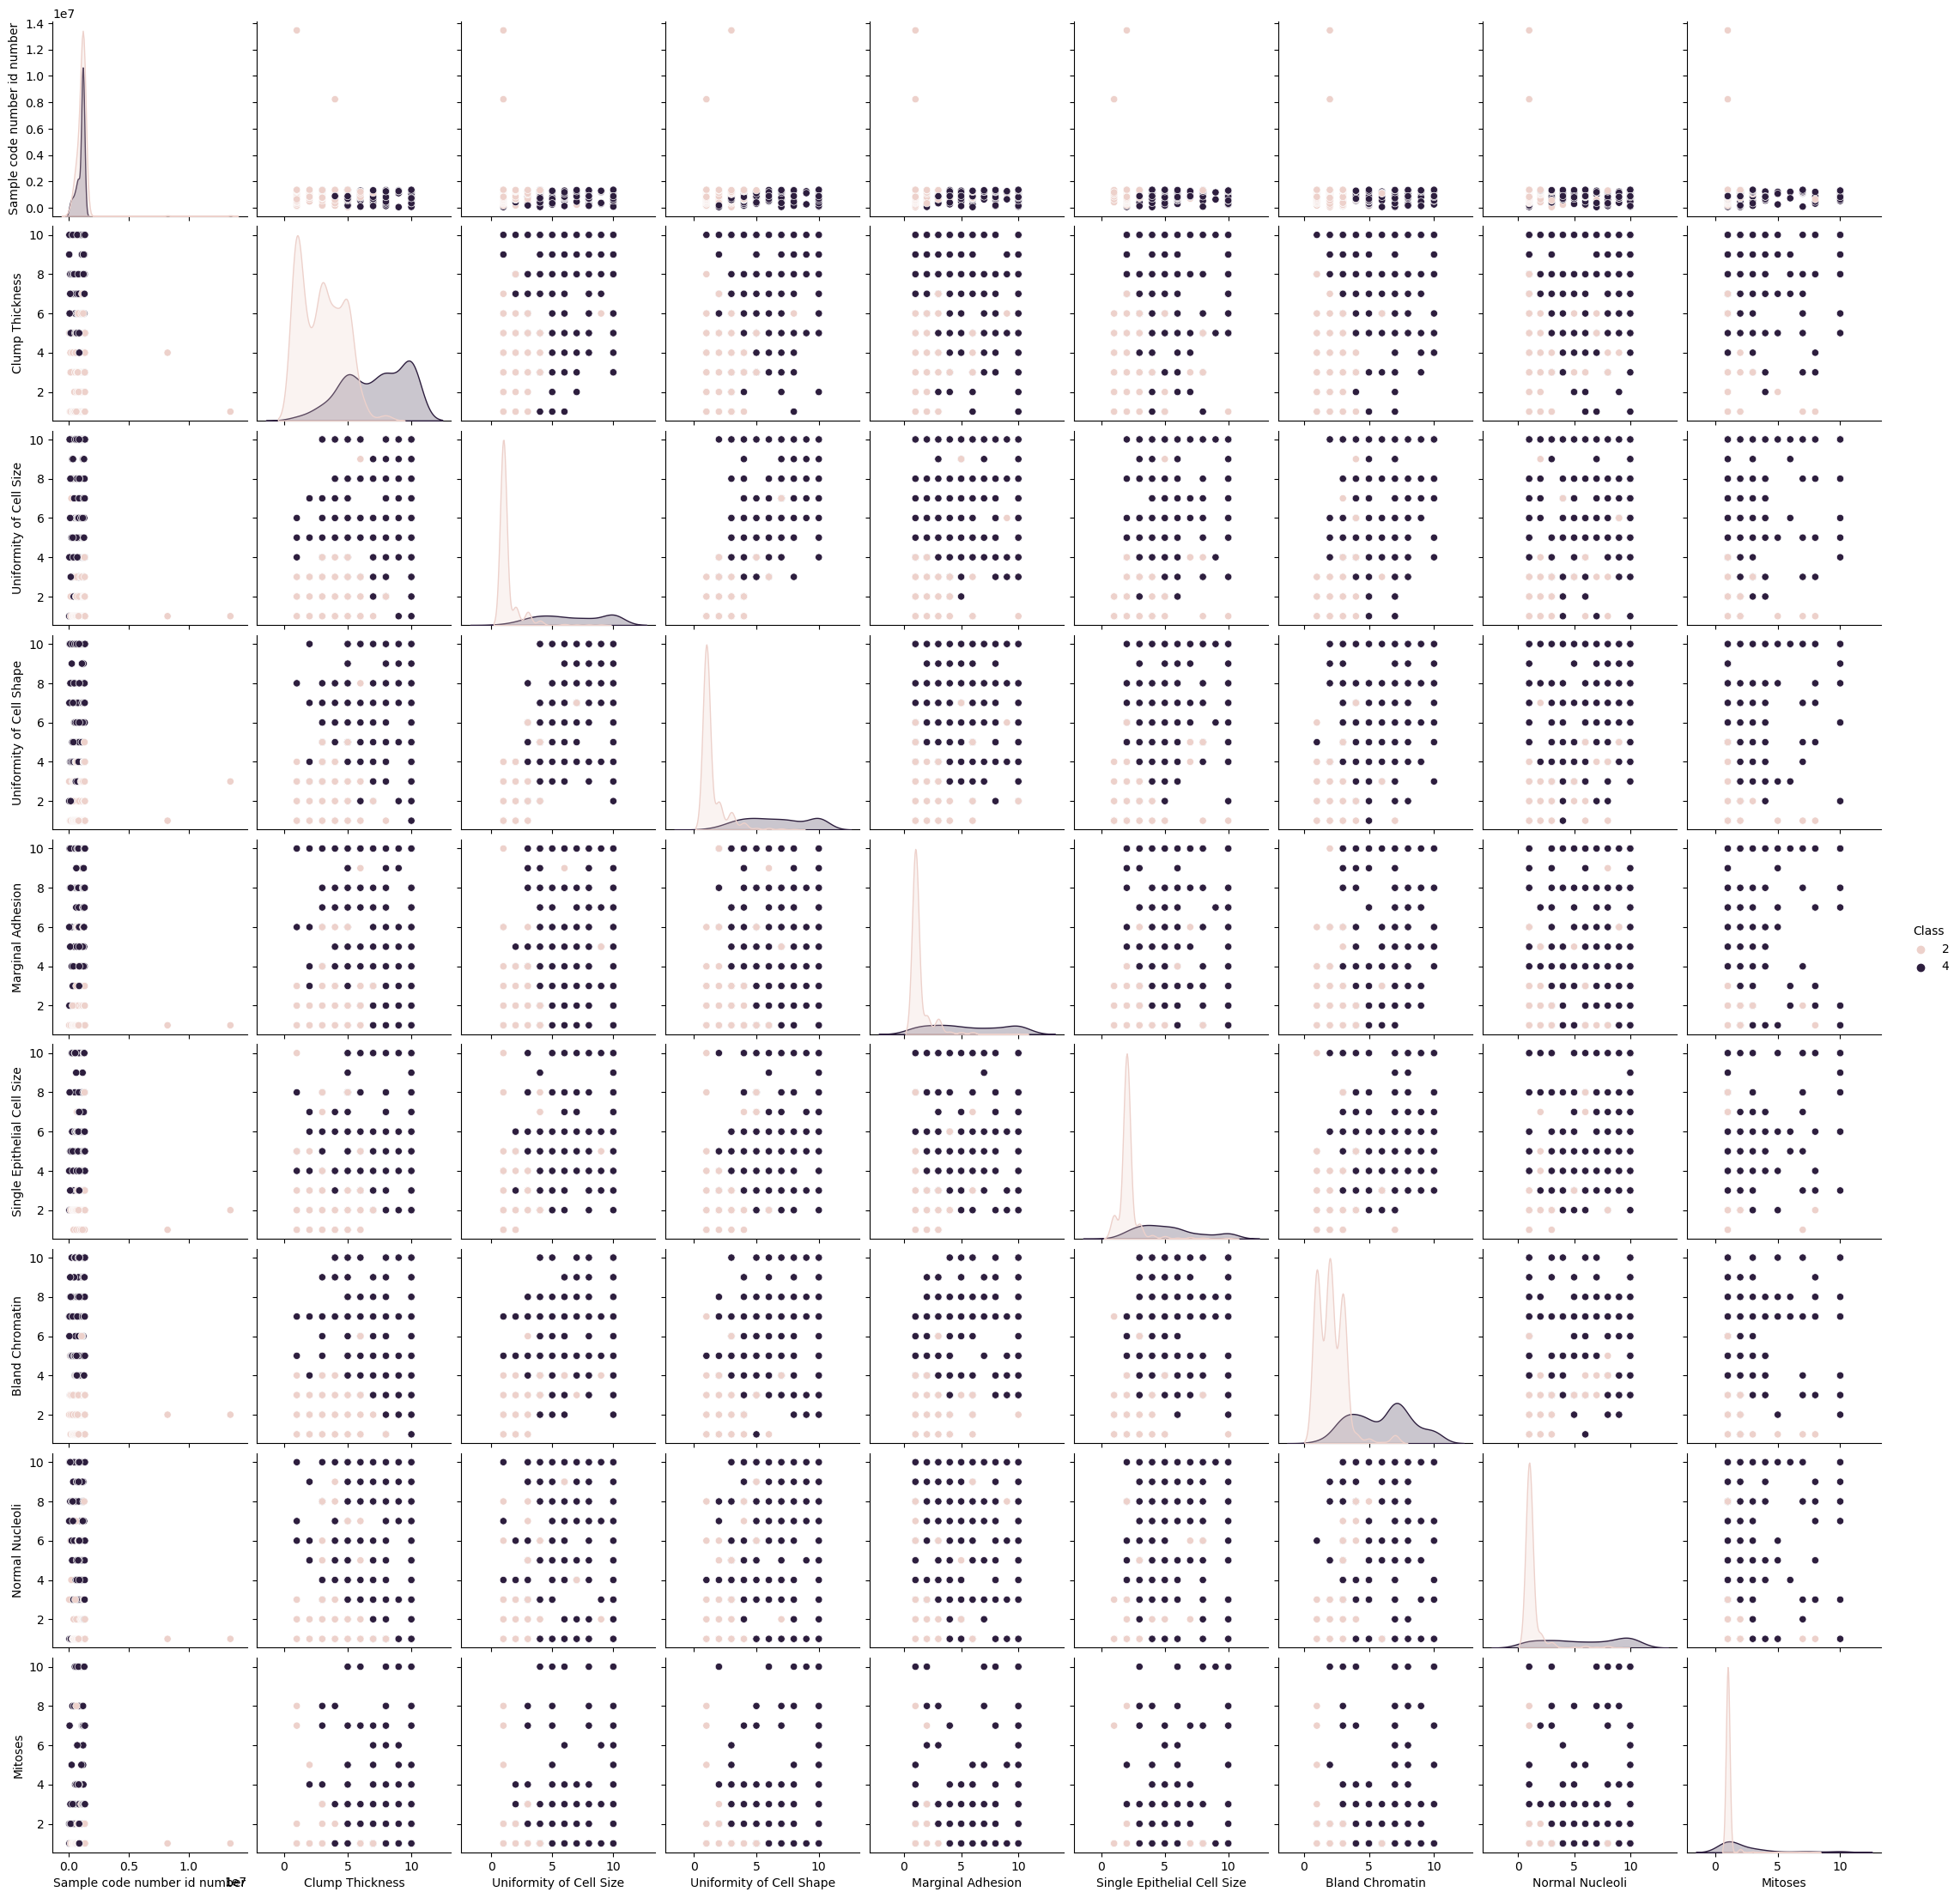

In [19]:
sns.pairplot(df,hue="Class")

In [63]:
df['Clump Thickness'] = df['Clump Thickness'].astype(int)

In [64]:
df['Uniformity of Cell Size'] = df['Uniformity of Cell Size'].astype(int)

In [65]:
df['Uniformity of Cell Shape'] = df['Uniformity of Cell Shape'].astype(int)

In [66]:
df['Marginal Adhesion'] = df['Marginal Adhesion'].astype(int)

In [67]:
df['Single Epithelial Cell Size'] = df['Single Epithelial Cell Size'].astype(int)

In [69]:
#df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [70]:
df['Bland Chromatin'] = df['Bland Chromatin'].astype(int)

In [71]:
df['Normal Nucleoli'] = df['Normal Nucleoli'].astype(int)

In [72]:
df['Mitoses'] = df['Mitoses'].astype(int)

In [20]:
# Inputs and Outputs
inputs = df[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
outputs = df['Class']

In [21]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [78]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [56]:
type(df['Sample code number id number'])

pandas.core.series.Series

In [80]:
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

In [83]:
(knn.predict(inputs_test)==outputs_test).sum()

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


221

In [ ]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [89]:
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
#classifier.fit(X_train, Y_train)
classifier.fit(inputs_train, outputs_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [90]:
Y_pred = classifier.predict(inputs_test)

In [91]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix(outputs_test, Y_pred)

In [92]:
cm

array([[150,   6],
       [  5,  70]], dtype=int64)

In [93]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(outputs_test,Y_pred)

In [94]:
accuracy

0.9523809523809523

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
inputs_train = scaler.fit_transform(inputs_train)

In [101]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(inputs_train, outputs_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [102]:
inputs_test = scaler.transform(inputs_test)

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [103]:
y_pred = model.predict(inputs_test)

In [104]:
model.score(inputs_train, outputs_train)

0.9594017094017094

In [105]:
model.score(inputs_test, outputs_test)

0.3246753246753247

In [106]:
confusion_matrix(outputs_test, y_pred)

array([[  0, 156],
       [  0,  75]], dtype=int64)

In [107]:
cm = confusion_matrix(outputs_test, y_pred)

In [108]:
cm

array([[  0, 156],
       [  0,  75]], dtype=int64)

In [109]:
accuracy = accuracy_score(outputs_test,Y_pred)

In [110]:
accuracy

0.9523809523809523

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(outputs_test, y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       156
           4       0.32      1.00      0.49        75

    accuracy                           0.32       231
   macro avg       0.16      0.50      0.25       231
weighted avg       0.11      0.32      0.16       231



C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
